In [1]:
# this notebook is for performance testing with a validation set for proposed method with same alternatives but differnt set of users to validate the regression approach of preference estimation.
game_list = [
    "Disco Elysium",
    "Lies of P",
    "Mafia III",
    "Total War: WARHAMMER III",
    "Resident Evil 3",
    "Phasmophobia",
    "Tom Clancy’s The Division 2",
    "The Witcher 3: Wild Hunt",
    "Fallout 76",
    "Cities: Skylines",
    "God of War: Ragnarok",
    "Just Cause 3",
    "Star Wars Jedi: Survivor",
    "Resident Evil Village",
    "Lightning Returns: Final Fantasy XIII",
    "Elden Ring",
    "Anno 2205",
    "Pay Day 2"
]

meta_scores = [91,80,68,86,77,76,82,92,52,85,94,74,85,84,66,96,72,79]

# [RPG/Story, Action, Shooting, Open World, Strategy, Horror]
pref_matrix = [
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,0.5,0.5,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
    [0,0,0,0,0,1],
    [0,0,0.5,0.5,0,0],
    [0,0.5,0,0.5,0,0],
    [0,0,0.5,0.5,0,0],
    [0,0,0,0,1,0],
    [0.5,0.5,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,0,0,0],
    [0,0,0,0,0,1],
    [0.5,0.5,0,0,0,0],
    [0,0.5,0,0.5,0,0],
    [0,0,0,0,1,0],
    [0,0,1,0,0,0]
]

In [2]:
def questionnare_generation(scores, meta_scores):

    bscore = (scores[0] - meta_scores[0])
    if bscore <= 3 and bscore > -3:
        rpg_star = 3
    elif bscore <= 6 and bscore > 3:
        rpg_star = 4
    elif bscore > 6:
        rpg_star = 5
    elif bscore <= -3 and bscore > -6:
        rpg_star = 2
    else:
        rpg_star = 1

    bscore = (scores[1] - meta_scores[1])
    if bscore <= 3 and bscore > -3:
        act_star = 3
    elif bscore <= 6 and bscore > 3:
        act_star = 4
    elif bscore > 6:
        act_star = 5
    elif bscore <= -3 and bscore > -6:
        act_star = 2
    else:
        act_star = 1

    bscore = (scores[17] - meta_scores[17])
    if bscore <= 3 and bscore > -3:
        fps_star = 3
    elif bscore <= 6 and bscore > 3:
        fps_star = 4
    elif bscore > 6:
        fps_star = 5
    elif bscore <= -3 and bscore > -6:
        fps_star = 2
    else:
        fps_star = 1

    bscore = (scores[11] - meta_scores[11])
    if bscore <= 3 and bscore > -3:
        ow_star = 3
    elif bscore <= 6 and bscore > 3:
        ow_star = 4
    elif bscore > 6:
        ow_star = 5
    elif bscore <= -3 and bscore > -6:
        ow_star = 2
    else:
        ow_star = 1

    bscore = (scores[3] - meta_scores[3])
    if bscore <= 3 and bscore > -3:
        rts_star = 3
    elif bscore <= 6 and bscore > 3:
        rts_star = 4
    elif bscore > 6:
        rts_star = 5
    elif bscore <= -3 and bscore > -6:
        rts_star = 2
    else:
        rts_star = 1
    
    bscore = (scores[4] - meta_scores[4])
    if bscore <= 3 and bscore > -3:
        hor_star = 3
    elif bscore <= 6 and bscore > 3:
        hor_star = 4
    elif bscore > 6:
        hor_star = 5
    elif bscore <= -3 and bscore > -6:
        hor_star = 2
    else:
        hor_star = 1

    return (rpg_star, act_star, fps_star, ow_star, rts_star, hor_star)
    

In [3]:
# copy the scores of the train dataset
train_scores = [[96, 70, 65, 85, 77, 76, 79, 87, 49, 84, 92, 73, 75, 84, 64, 91, 71, 74],
 [99, 76, 68, 83, 73, 72, 82, 89, 52, 82, 96, 72, 81, 80, 68, 93, 69, 81],
 [82, 87, 69, 85, 71, 70, 83, 96, 53, 84, 93, 74, 92, 78, 65, 100, 71, 81],
 [98, 77, 65, 87, 72, 71, 79, 90, 49, 86, 96, 74, 82, 79, 68, 94, 73, 74],
 [84, 77, 68, 88, 79, 78, 82, 90, 52, 87, 89, 72, 82, 86, 61, 94, 74, 81],
 [88, 84, 70, 90, 75, 74, 84, 96, 54, 89, 94, 79, 89, 82, 66, 100, 76, 79],
 [86, 79, 68, 78, 73, 72, 82, 89, 52, 77, 91, 68, 84, 80, 63, 93, 64, 84],
 [88, 89, 70, 82, 81, 80, 84, 98, 54, 81, 97, 76, 94, 88, 69, 100, 68, 80],
 [94, 80, 65, 83, 70, 69, 79, 90, 49, 82, 95, 69, 85, 77, 67, 94, 69, 78],
 [99, 80, 63, 89, 82, 81, 77, 90, 47, 88, 98, 71, 85, 89, 70, 94, 75, 71],
 [94, 73, 65, 93, 80, 79, 79, 89, 49, 92, 92, 75, 78, 87, 64, 93, 79, 72],
 [85, 77, 73, 93, 84, 83, 87, 97, 57, 92, 90, 87, 82, 91, 62, 100, 79, 76],
 [87, 70, 71, 86, 74, 73, 85, 87, 55, 85, 87, 74, 75, 81, 59, 91, 72, 84],
 [92, 84, 64, 88, 82, 81, 78, 91, 48, 87, 96, 68, 89, 89, 68, 95, 74, 78],
 [87, 84, 65, 89, 72, 71, 79, 90, 49, 88, 94, 67, 89, 79, 66, 94, 75, 80],
 [98, 84, 66, 77, 77, 76, 80, 92, 50, 76, 99, 70, 89, 84, 71, 96, 63, 80],
 [98, 77, 67, 85, 81, 80, 81, 89, 51, 84, 96, 72, 82, 88, 68, 93, 71, 80],
 [99, 78, 65, 84, 76, 75, 79, 91, 49, 83, 97, 73, 83, 83, 69, 95, 70, 74],
 [88, 78, 60, 91, 71, 70, 74, 86, 44, 90, 91, 65, 83, 78, 63, 90, 77, 72],
 [83, 76, 70, 88, 79, 78, 84, 90, 54, 87, 88, 74, 81, 86, 60, 94, 74, 82],
 [91, 85, 70, 94, 74, 73, 84, 96, 54, 93, 96, 76, 90, 81, 68, 100, 80, 80],
 [87, 85, 74, 92, 83, 82, 88, 98, 58, 91, 95, 82, 90, 90, 67, 100, 78, 83],
 [88, 83, 67, 79, 80, 79, 81, 97, 51, 78, 94, 80, 88, 87, 66, 100, 65, 71],
 [78, 86, 66, 90, 85, 84, 80, 94, 50, 89, 91, 73, 91, 92, 63, 98, 76, 76],
 [98, 82, 68, 85, 78, 77, 82, 92, 52, 84, 98, 73, 87, 85, 70, 96, 71, 79],
 [95, 80, 71, 84, 76, 75, 85, 88, 55, 83, 96, 66, 85, 83, 68, 92, 70, 93],
 [91, 73, 77, 94, 77, 76, 91, 93, 61, 93, 90, 84, 78, 84, 62, 97, 80, 86],
 [92, 80, 69, 83, 76, 75, 83, 88, 53, 82, 95, 66, 85, 83, 67, 92, 69, 89],
 [88, 80, 67, 89, 76, 75, 81, 95, 51, 88, 93, 79, 85, 83, 65, 99, 75, 71],
 [88, 82, 66, 86, 76, 75, 80, 95, 50, 85, 94, 77, 87, 83, 66, 99, 72, 72],
 [93, 85, 70, 81, 83, 82, 84, 95, 54, 80, 97, 76, 90, 90, 69, 99, 67, 81],
 [88, 81, 68, 89, 79, 78, 82, 93, 52, 88, 93, 75, 86, 86, 65, 97, 75, 79],
 [89, 77, 68, 96, 74, 73, 82, 90, 52, 95, 92, 72, 82, 81, 64, 94, 82, 80],
 [97, 83, 69, 90, 75, 74, 83, 94, 53, 89, 98, 75, 88, 82, 70, 98, 76, 80],
 [91, 79, 72, 88, 81, 80, 86, 95, 56, 87, 94, 80, 84, 88, 66, 99, 74, 81],
 [91, 80, 62, 91, 75, 74, 76, 86, 46, 90, 94, 62, 85, 82, 66, 90, 77, 80],
 [86, 75, 69, 85, 82, 81, 83, 94, 53, 84, 89, 82, 80, 89, 61, 98, 71, 72],
 [97, 78, 70, 81, 75, 74, 84, 95, 54, 80, 96, 82, 83, 82, 68, 99, 67, 75],
 [91, 78, 65, 86, 80, 79, 79, 89, 49, 85, 93, 70, 83, 87, 65, 93, 72, 77],
 [90, 82, 66, 91, 73, 72, 80, 91, 50, 90, 95, 69, 87, 80, 67, 95, 77, 80],
 [92, 79, 72, 83, 72, 71, 86, 92, 56, 82, 94, 75, 84, 79, 66, 96, 69, 86],
 [92, 77, 66, 90, 75, 74, 80, 91, 50, 89, 93, 74, 82, 82, 65, 95, 76, 74],
 [99, 80, 71, 83, 76, 75, 85, 93, 55, 82, 98, 76, 85, 83, 70, 97, 69, 83],
 [96, 81, 68, 90, 82, 81, 82, 94, 52, 89, 97, 78, 86, 89, 69, 98, 76, 74],
 [93, 80, 69, 84, 71, 70, 83, 90, 53, 83, 95, 70, 85, 78, 67, 94, 70, 85],
 [98, 74, 62, 95, 68, 67, 76, 82, 46, 94, 95, 60, 79, 75, 67, 86, 81, 81],
 [92, 90, 69, 87, 71, 70, 83, 96, 53, 86, 99, 72, 95, 78, 71, 100, 73, 82],
 [91, 79, 68, 86, 78, 77, 82, 91, 52, 85, 94, 72, 84, 85, 66, 95, 72, 81],
 [98, 81, 66, 88, 84, 83, 80, 91, 50, 87, 98, 72, 86, 91, 70, 95, 74, 76],
 [91, 83, 65, 94, 78, 77, 79, 92, 49, 93, 96, 72, 88, 85, 68, 96, 80, 75]]

In [4]:
questionnares = []
for i in range(50):
    questionnares.append(questionnare_generation(train_scores[i], meta_scores))

In [5]:
# copied from the unsloth llama3 workspace, which is the profile infered by finetuned llama-3-8b-instruct
profile_llama3 = [[0, 7, 10, 3, 15, 9, 5, 13, 4, 2, 6, 11, 1, 12, 17, 16, 14, 8],
 [0, 7, 10, 15, 1, 3, 6, 9, 12, 13, 2, 5, 4, 17, 11, 16, 14, 8],
 [0, 7, 10, 1, 12, 15, 3, 9, 6, 13, 4, 2, 5, 17, 11, 16, 14, 8],
 [0, 7, 10, 3, 1, 12, 15, 9, 6, 4, 13, 11, 5, 17, 2, 16, 14, 8],
 [0, 7, 3, 10, 15, 1, 9, 12, 4, 5, 6, 13, 2, 17, 11, 16, 14, 8],
 [0, 7, 10, 15, 1, 12, 3, 9, 4, 6, 11, 13, 5, 2, 17, 16, 14, 8],
 [0, 7, 10, 1, 15, 12, 3, 6, 9, 13, 4, 5, 11, 17, 2, 16, 14, 8],
 [0, 7, 1, 10, 12, 15, 3, 4, 6, 13, 5, 9, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 15, 1, 12, 3, 9, 13, 11, 17, 6, 2, 4, 5, 16, 8, 14],
 [0, 7, 10, 15, 3, 13, 1, 4, 12, 9, 5, 11, 2, 17, 6, 16, 14, 8],
 [0, 7, 3, 9, 10, 13, 15, 4, 5, 11, 17, 6, 1, 12, 16, 2, 14, 8],
 [0, 7, 10, 15, 3, 1, 4, 9, 12, 13, 6, 2, 5, 11, 17, 16, 14, 8],
 [0, 7, 10, 15, 3, 6, 9, 13, 12, 17, 4, 2, 5, 11, 1, 14, 16, 8],
 [0, 7, 10, 12, 3, 1, 13, 15, 9, 4, 5, 6, 2, 11, 17, 16, 14, 8],
 [0, 7, 10, 15, 9, 1, 3, 12, 4, 13, 5, 6, 17, 2, 11, 14, 16, 8],
 [0, 10, 7, 12, 1, 15, 13, 4, 6, 3, 5, 9, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 3, 4, 13, 15, 1, 12, 9, 6, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 15, 1, 12, 3, 9, 13, 4, 5, 11, 6, 17, 2, 16, 14, 8],
 [0, 7, 3, 10, 9, 15, 12, 1, 13, 4, 5, 17, 6, 11, 16, 14, 2, 8],
 [0, 7, 3, 10, 4, 6, 15, 9, 13, 12, 1, 2, 5, 17, 11, 16, 14, 8],
 [0, 7, 10, 15, 3, 1, 6, 12, 9, 13, 4, 5, 2, 11, 17, 16, 14, 8],
 [0, 7, 10, 15, 1, 3, 9, 12, 4, 6, 5, 13, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 12, 15, 13, 1, 3, 4, 5, 9, 6, 11, 17, 16, 14, 2, 8],
 [7, 0, 1, 15, 3, 5, 10, 9, 12, 4, 13, 6, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 1, 12, 3, 15, 4, 9, 13, 5, 6, 11, 17, 2, 16, 14, 8],
 [0, 10, 7, 12, 3, 1, 15, 9, 13, 5, 6, 4, 17, 2, 11, 16, 14, 8],
 [0, 7, 3, 10, 9, 6, 15, 11, 13, 4, 5, 2, 12, 17, 16, 14, 1, 8],
 [0, 7, 10, 3, 15, 12, 1, 13, 6, 9, 4, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 12, 15, 3, 9, 1, 13, 4, 6, 11, 5, 2, 17, 16, 14, 8],
 [0, 7, 10, 15, 1, 3, 12, 9, 4, 6, 13, 5, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 12, 1, 15, 13, 3, 4, 5, 9, 6, 2, 11, 17, 16, 14, 8],
 [0, 7, 3, 10, 12, 1, 15, 9, 4, 13, 5, 6, 11, 2, 17, 16, 14, 8],
 [0, 3, 7, 9, 10, 15, 6, 12, 13, 1, 4, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 1, 12, 3, 15, 9, 6, 13, 4, 5, 11, 2, 17, 16, 14, 8],
 [0, 7, 10, 1, 3, 12, 15, 9, 4, 6, 13, 5, 11, 2, 17, 16, 14, 8],
 [0, 7, 10, 9, 1, 12, 3, 15, 13, 4, 5, 6, 17, 11, 16, 14, 2, 8],
 [0, 7, 10, 3, 15, 4, 5, 13, 9, 12, 6, 1, 11, 2, 17, 16, 14, 8],
 [0, 7, 10, 15, 6, 3, 9, 11, 12, 13, 1, 4, 5, 17, 2, 16, 14, 8],
 [0, 7, 10, 3, 9, 15, 4, 12, 13, 5, 6, 1, 11, 17, 2, 16, 14, 8],
 [0, 10, 7, 1, 12, 15, 3, 9, 4, 6, 13, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 3, 15, 6, 1, 12, 9, 13, 11, 5, 17, 2, 4, 16, 14, 8],
 [0, 7, 10, 3, 9, 15, 12, 13, 1, 4, 6, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 15, 3, 1, 12, 6, 9, 13, 4, 2, 17, 5, 11, 16, 14, 8],
 [0, 7, 10, 3, 12, 15, 9, 13, 5, 1, 4, 6, 11, 17, 2, 16, 14, 8],
 [0, 7, 10, 15, 12, 1, 3, 9, 13, 6, 5, 17, 4, 2, 11, 16, 14, 8],
 [0, 3, 10, 7, 9, 15, 12, 17, 6, 13, 1, 5, 16, 11, 4, 2, 14, 8],
 [0, 7, 10, 1, 15, 3, 9, 12, 6, 13, 4, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 3, 9, 15, 12, 1, 13, 6, 4, 5, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 3, 4, 12, 13, 15, 1, 9, 5, 6, 17, 11, 2, 16, 14, 8],
 [0, 7, 10, 9, 1, 12, 15, 3, 13, 4, 5, 6, 2, 17, 11, 16, 14, 8]]

In [6]:
import Aggregation.sampling as sp

schedule = []
for _ in range(10):
    schedule.append((0.6, 1.5))
for _ in range(10):
    schedule.append((0.4, 1.0))
for _ in range(10):
    schedule.append((0.2, 0.6))
for _ in range(10):
    schedule.append((0.15, 0.4))
for _ in range(10):
    schedule.append((0.1, 0.2))

log = sp.theta_estimation(profile_llama3, alternative_number=18, iteration=50, sampling_rate=1000, keep_rate=100, resampling_schedule=schedule)

game list loaded
iteration 0: average likelihood (log_value) is   -0.8356040921467569
iteration 1: average likelihood (log_value) is   -0.5909482014204284
iteration 2: average likelihood (log_value) is   -0.5845151047626741
iteration 3: average likelihood (log_value) is   -0.5757221980159969
iteration 4: average likelihood (log_value) is   -0.5711685660657877
iteration 5: average likelihood (log_value) is   -0.569967418223608
iteration 6: average likelihood (log_value) is   -0.5689425102734532
iteration 7: average likelihood (log_value) is   -0.5653377005608253
iteration 8: average likelihood (log_value) is   -0.5623776444900259
iteration 9: average likelihood (log_value) is   -0.5595139431614724
iteration 10: average likelihood (log_value) is   -0.5584894402006175
iteration 11: average likelihood (log_value) is   -0.39198411691449936
iteration 12: average likelihood (log_value) is   -0.3831214449447687
iteration 13: average likelihood (log_value) is   -0.379465324151149
iteration 14: 

In [7]:
import numpy as np
zeta_estimation = log[49]['zeta_estimation']

In [8]:
theta_estimation = log[49]['theta_estimation']

In [9]:
#normalize zeta to make it has a mean of 0.
zeta_est_avg = np.mean(zeta_estimation, axis=0)
zeta_norm_est = zeta_estimation - np.tile(zeta_est_avg, (50, 1))

In [10]:
# get X of regression model
# X = stars + game title
stars = []
titles = []
for i in range (50):
    for j in range(18):
        stars.append(list(questionnares[i]))
        titles.append(j)
stars = np.array(stars)
titles = np.array(titles)


In [11]:
outputs = zeta_norm_est.reshape(-1)

In [ ]:
#be careful here
outputs = outputs * 100

In [20]:
np.min(outputs)

-2.7339562984219836

In [13]:
#define the regression model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Embedding, Flatten, LayerNormalization


In [21]:
scores_input = Input(shape=(6,), name='scores_input')
title_input = Input(shape=(1,), name='title_input')

normalized_scores = LayerNormalization(name="score_norm")(scores_input)

title_embd = Embedding(input_dim=18+1, output_dim=4, name='title_embd')(title_input)
title_embd_flat = Flatten()(title_embd)

concat_input = Concatenate()([normalized_scores, title_embd_flat])

hidden_layer_1 = Dense(64, activation="relu")(concat_input)
hidden_layer_2 = Dense(48, activation="relu")(hidden_layer_1)
hidden_layer_3 = Dense(32, activation="relu")(hidden_layer_2)
out_layer = Dense(1, activation="linear")(hidden_layer_3)

In [22]:
ann_model = Model(inputs=[scores_input, title_input], outputs=out_layer)
ann_model.compile(optimizer='adam', loss="mse", metrics=["mae"])
ann_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scores_input        │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ title_embd          │ (None, 1, 4)      │         76 │ title_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ score_norm          │ (None, 6)         │         12 │ scores_input[0][… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 4)         │          0 │ title_embd[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 10)        │          0 │ score_norm[0][0], │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │        704 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 48)        │      3,120 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      1,568 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         33 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,513 (21.54 KB)

 Trainable params: 5,513 (21.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = ann_model.fit(
    [stars[:700], titles[:700]], outputs[:700],
    validation_data = ([stars[700:], titles[700:]], outputs[700:]),
    epochs=10,
    batch_size=32
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4852 - mae: 0.5273 - val_loss: 0.3894 - val_mae: 0.4662
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4270 - mae: 0.4759 - val_loss: 0.3960 - val_mae: 0.4695
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4165 - mae: 0.4859 - val_loss: 0.3940 - val_mae: 0.4669
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3812 - mae: 0.4615 - val_loss: 0.3989 - val_mae: 0.4726
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4244 - mae: 0.4786 - val_loss: 0.4039 - val_mae: 0.4723
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3706 - mae: 0.4463 - val_loss: 0.4008 - val_mae: 0.4699
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3501 - mae: 0.4511 - val_loss: 0.4029 - val_mae: 0.4715
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3731 - mae: 0.4432 - val_loss: 0.4067 - val_mae: 0.4735
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3921 - mae: 

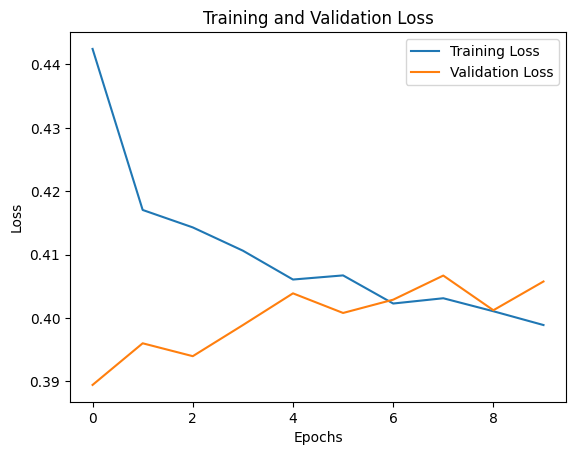

In [24]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

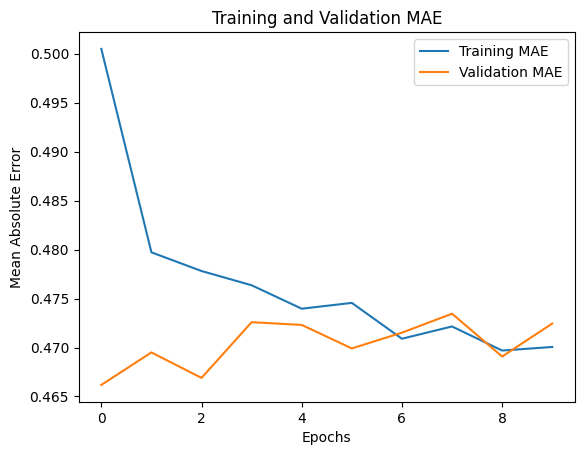

In [26]:
# Plot Training and Validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

In [ ]:
# test with synthesis new users:
def personal_scores_generation():
    prefrence = [sp.random_normal_distribution(0, 5) for _ in range(6)]
    personal_scores = dict()
    for i in range(18):
        score = meta_scores[i] + prefrence[0] * pref_matrix[i][0] + prefrence[1] * pref_matrix[i][1] + prefrence[2] * pref_matrix[i][2] + prefrence[3] * pref_matrix[i][3] + prefrence[4] * pref_matrix[i][4] + prefrence[5] * pref_matrix[i][5]
        personal_scores[game_list[i]] = min(round(score), 100)
    personal_scores["preference"] = prefrence
    return personal_scores

def ranking_generation(personal_profile):
    temp = personal_profile.copy()
    temp.pop("preference")
    return sorted(temp, key=temp.get, reverse=True)